In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import joblib

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model

In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/Indole_-_cytoprotekcja_.xlsx')

 55%|████████████████████████████████████████████▋                                     | 24/44 [00:02<00:01, 15.93it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 19.16it/s]


Data size (rows, columns): (44, 1613)
Data size after first reduction (rows, columns): (44, 1433)
Data size after second reduction (rows, columns): (44, 1182)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
          molecular descriptor name  corr_value  absolute correlation value
520                  ETA_dEpsilon_D    0.412783                    0.412783

In [4]:
without_standarization.predict(molecular_descriptors_df[hist2['molecular descriptor name']])

array([66.63888889, 82.5       , 75.08333333, 53.66666667, 69.70833333,
       69.70833333, 60.75      , 78.83333333, 26.91666667, 68.33333333,
       27.33333333, 70.33333333, 34.275     , 26.66666667, 34.275     ,
       58.66666667, 74.16666667, 72.        , 80.77083333, 80.77083333,
       71.5       , 46.125     , 46.125     , 68.91666667, 83.        ,
       57.        , 86.25      , 34.275     , 61.41666667, 79.29166667,
       84.58333333, 84.58333333, 37.66666667, 34.5       , 59.75      ,
       24.91666667, 71.41666667, 93.58333333, 93.33333333, 91.58333333,
       81.41666667, 84.        , 84.        , 76.75      ])

In [5]:
xs = r2_score(without_standarization.predict(molecular_descriptors_df[hist2['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])

In [6]:
xs

0.4912609963505382

In [7]:
np.sqrt(xs)

0.7009001329365961

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


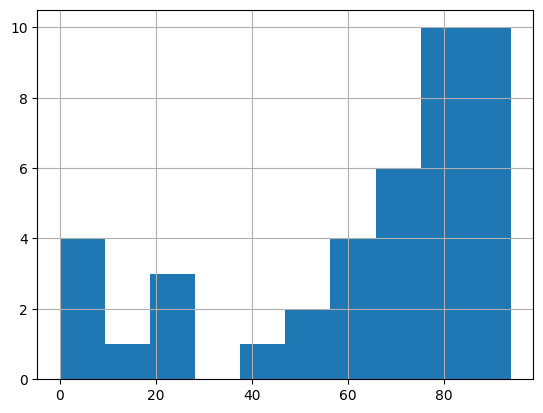

In [8]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [9]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 2


In [10]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
520,ETA_dEpsilon_D,0.412783,0.412783
1160,nHBDon,0.394681,0.394681


In [11]:
with_standarization, train_r2__, test_r2__, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=True, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
          molecular descriptor name  corr_value  absolute correlation value
520                  ETA_dEpsilon_D    0.412783                    0.412783
116

In [12]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 79.29166667, 81.5       , 79.29166667,
       81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 79.29166667, 81.5       , 81.5       ,
       81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 81.5       , 81.5       , 81.5       ,
       81.5       , 81.5       , 81.5       , 81.5       ])

In [13]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])

In [14]:
xs

-3584.6147053460722

# Search inside correlation space - selected test data

In [15]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
n_estimators = [range(2,21,1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    
    for estimator in n_estimators[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=estimator,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(estimator)


In [16]:
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])

In [17]:
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Number of estimators'] = fif_list

In [18]:
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
0,0.25,0.712454,-135.451417,46,2
1,0.25,0.757595,-35.190372,46,3
2,0.25,0.764431,-884.852459,46,4
3,0.25,0.805017,-3.365658,46,5
4,0.25,0.812656,-11.037206,46,6


## Plots

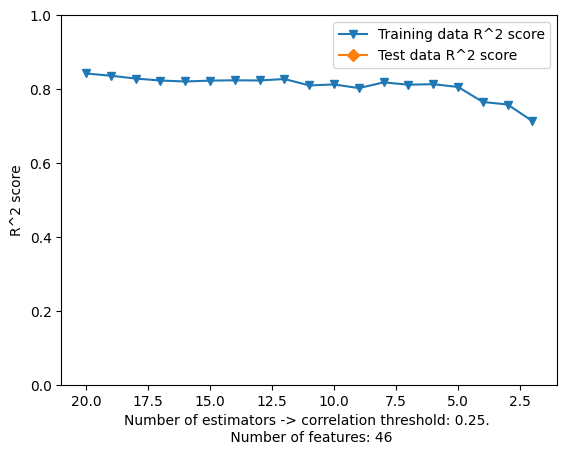

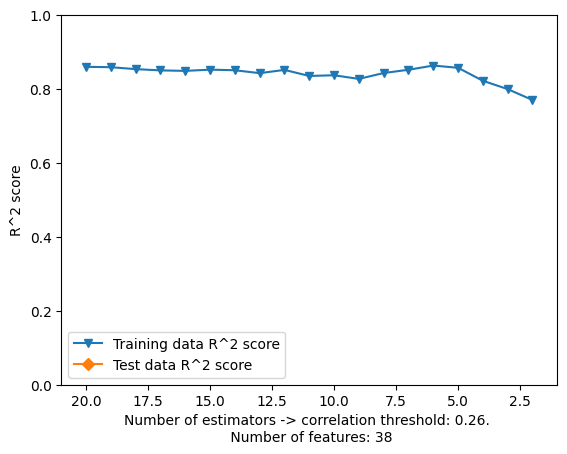

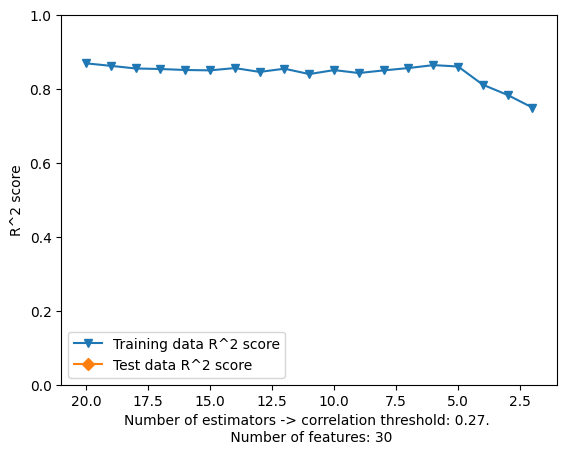

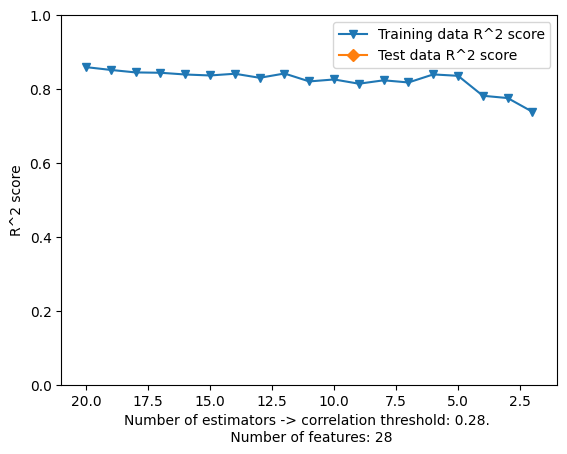

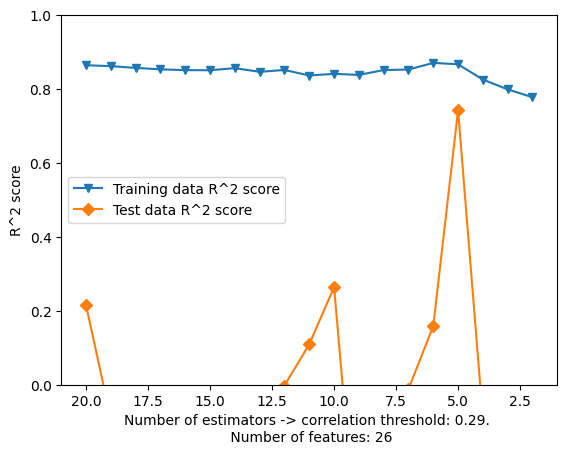

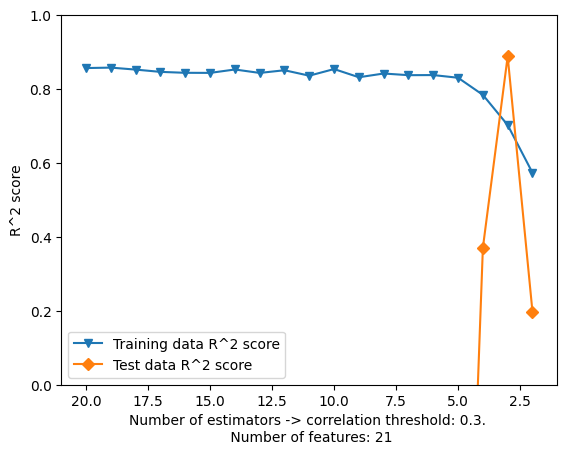

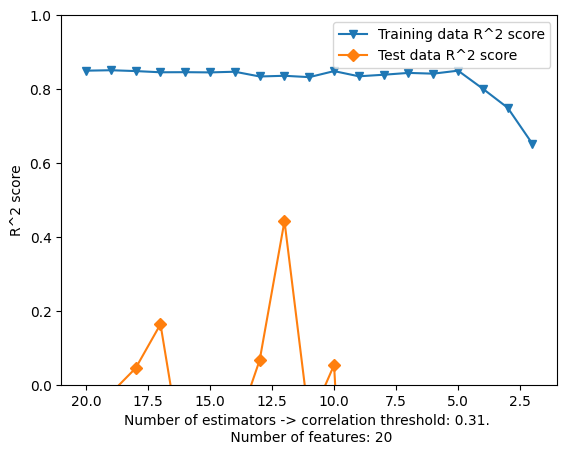

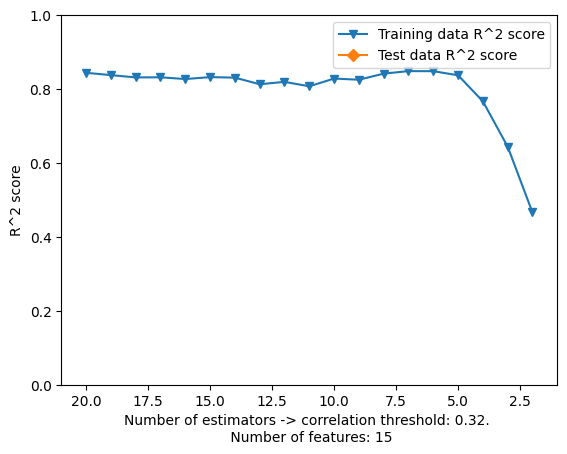

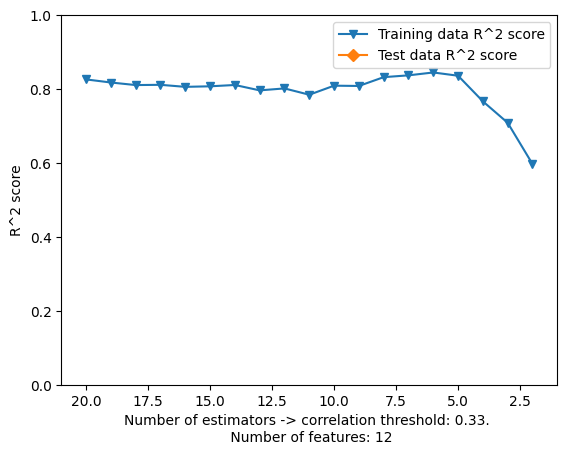

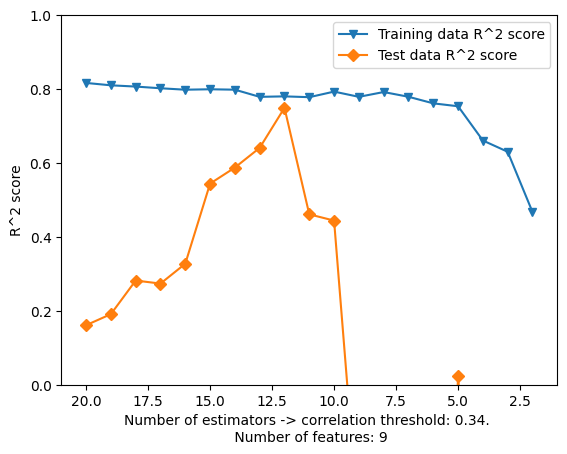

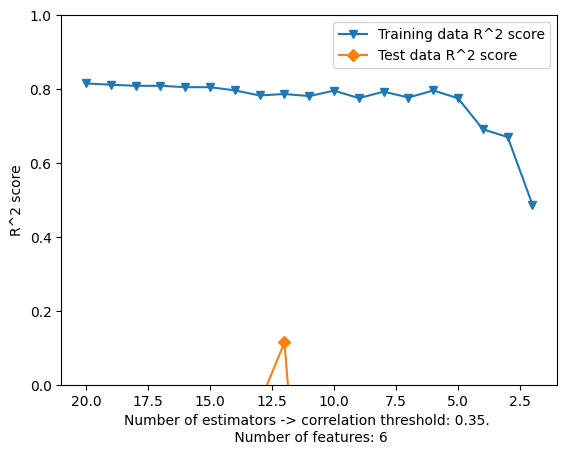

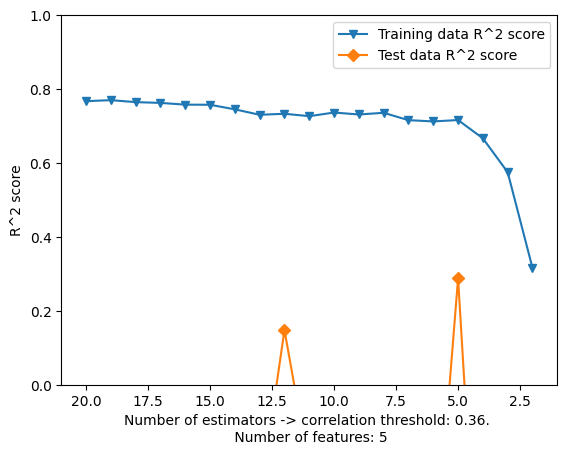

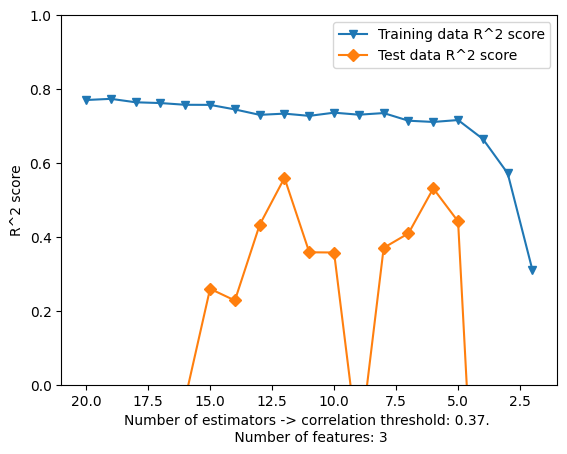

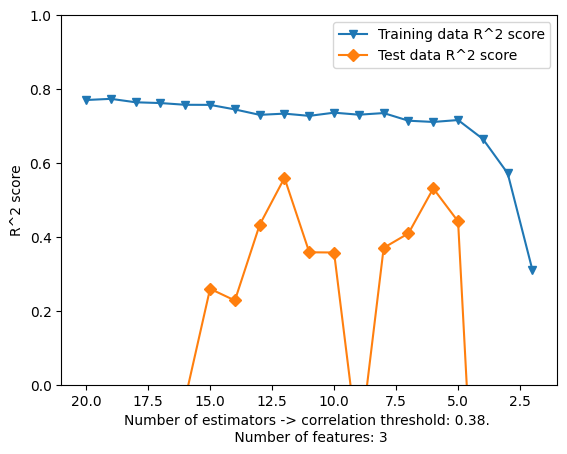

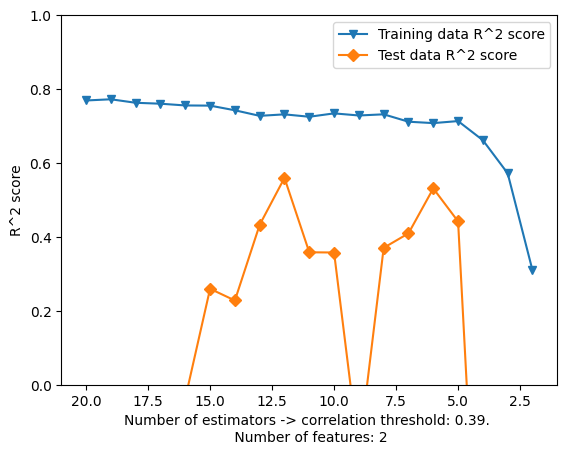

In [19]:
corre_list = [x / 100.0 for x in range(int(0.25*100), int(0.4*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Number of estimators'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Number of estimators'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Number of estimators -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Number of estimators'])+1, min(element_['Number of estimators'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

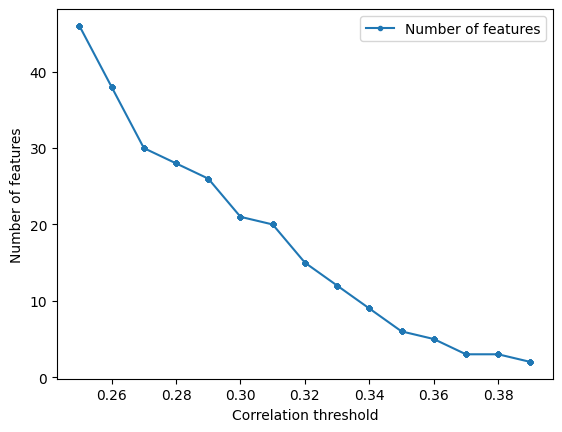

In [20]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [21]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.39


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
266,0.39,0.309155,-5.892156,2,2
267,0.39,0.571478,-7.226452,2,3
268,0.39,0.660977,-0.826711,2,4
269,0.39,0.712783,0.441333,2,5
270,0.39,0.707279,0.530540,2,6
271,0.39,0.711073,0.408985,2,7
272,0.39,0.731062,0.369805,2,8
273,0.39,0.727909,-0.184342,2,9
274,0.39,0.733621,0.357191,2,10
275,0.39,0.724485,0.357771,2,11


# sqrt(R^2)

In [22]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]

In [23]:
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]

In [24]:
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [25]:
xcz

[0,
 0,
 0,
 0.6643286199358233,
 0.7283818199547056,
 0.6395197251216412,
 0.6081160182443507,
 0,
 0.5976546562544083,
 0.5981397178104927,
 0.7477052085732371,
 0.6573526323941898,
 0.4768258110193037,
 0.5089628901189667,
 0,
 0,
 0,
 0,
 0]

In [26]:
r_a['test R value'] = xcz

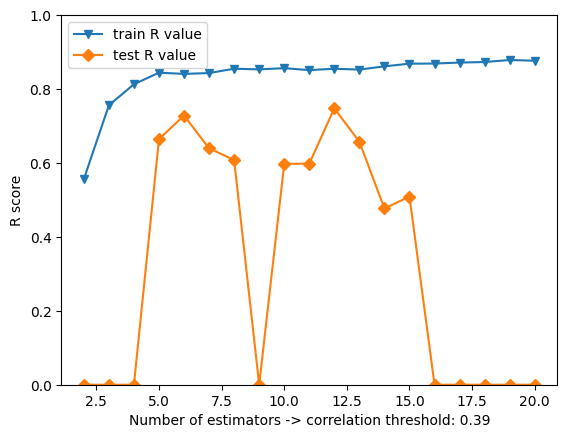

In [27]:
plt.plot(r_a['Number of estimators'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Number of estimators'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Number of estimators -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

# Search inside correlation space - train test split

In [28]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
n_estimators = [range(2,21,1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    
    for estimator in n_estimators[0]:
        
        without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=estimator,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(estimator)
        
df_without_standarization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_without_standarization['Number of estimators'] = fif_list
df_without_standarization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
0,0.25,0.546771,-0.370024,46,2
1,0.25,0.688731,-1.664602,46,3
2,0.25,0.744831,-4.651811,46,4
3,0.25,0.799361,-4.950571,46,5
4,0.25,0.799491,-4.140159,46,6


## Plots

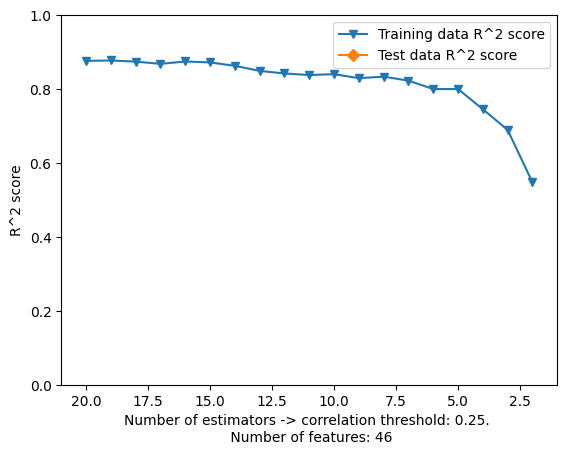

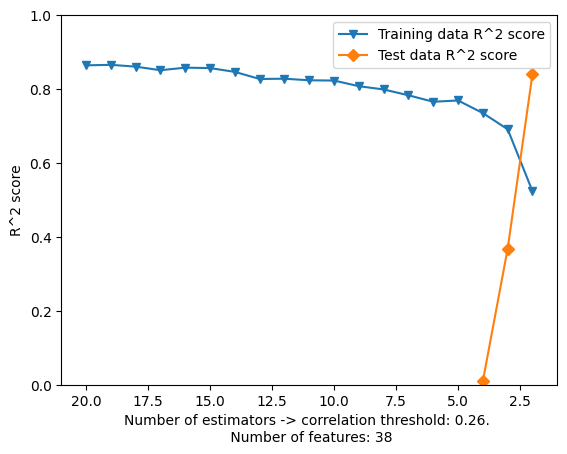

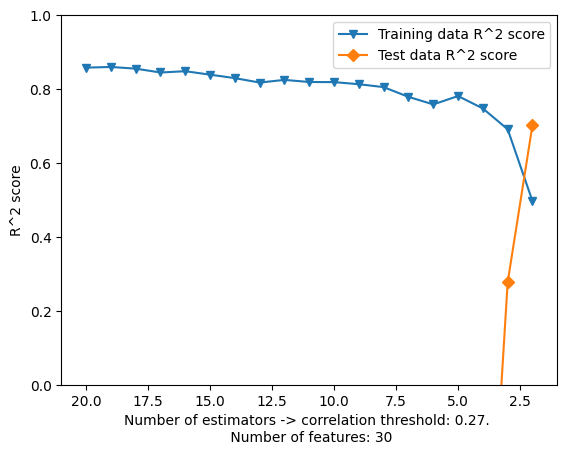

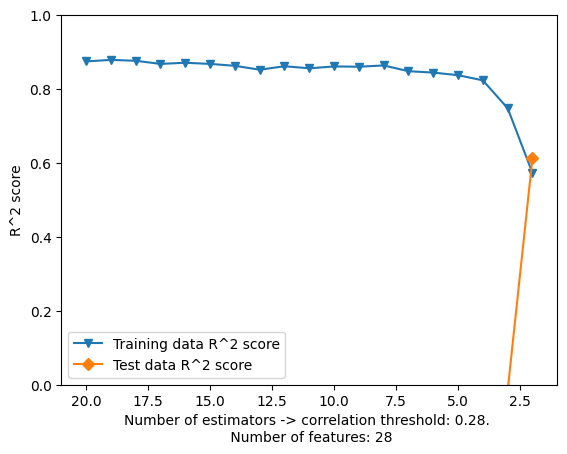

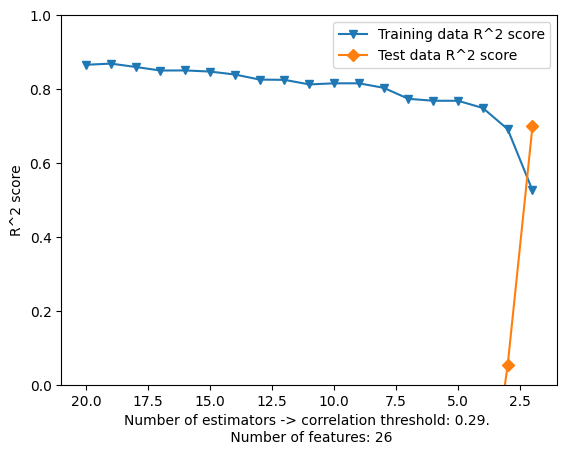

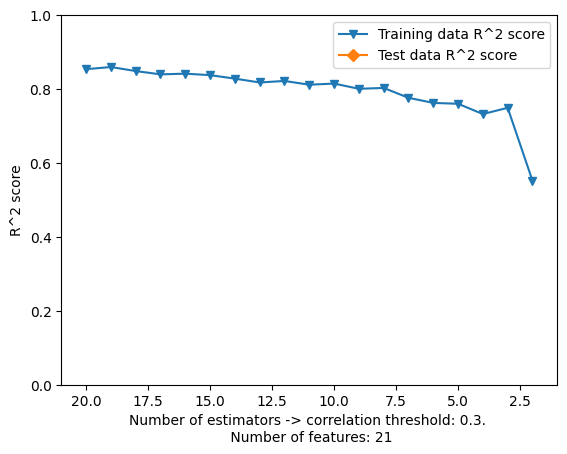

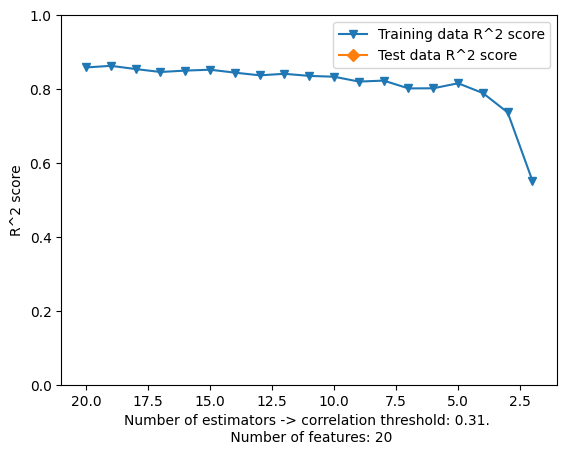

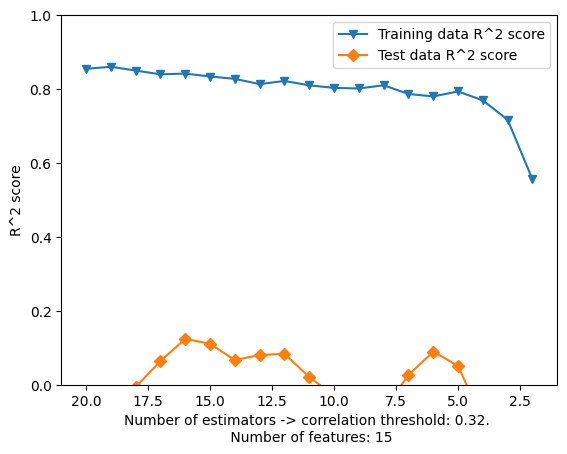

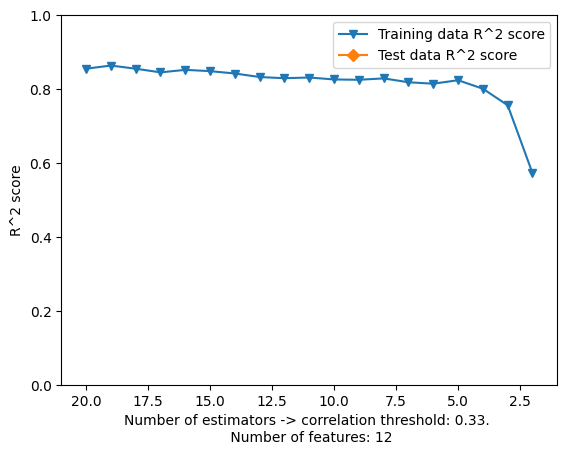

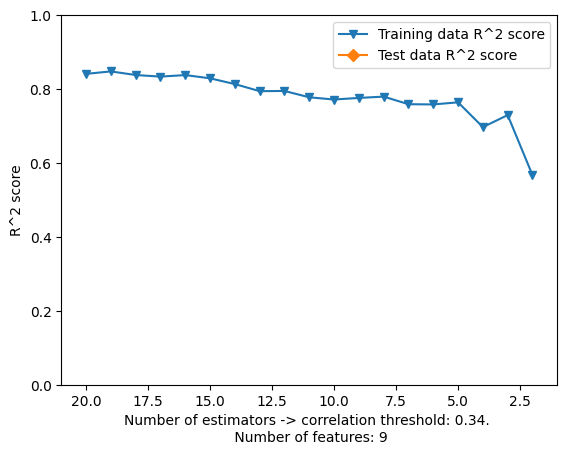

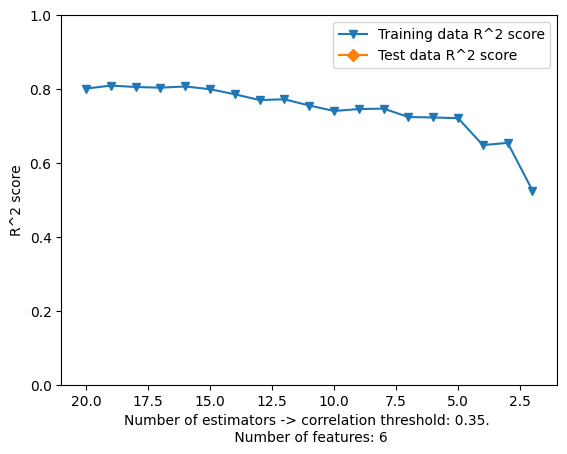

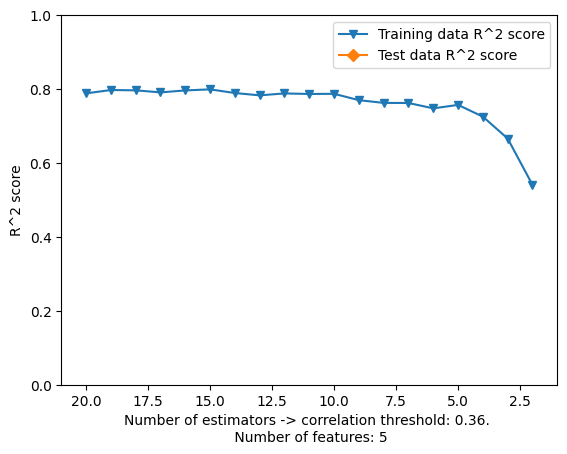

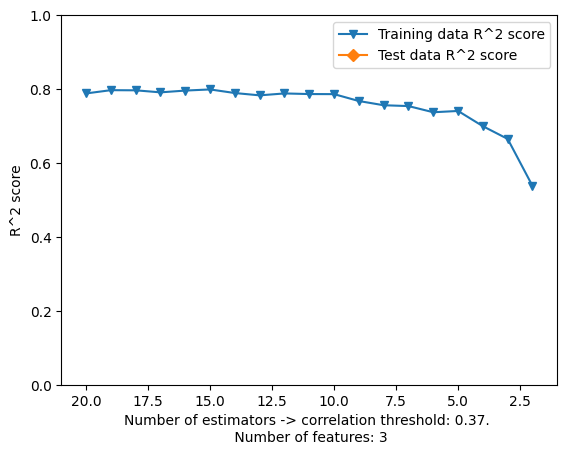

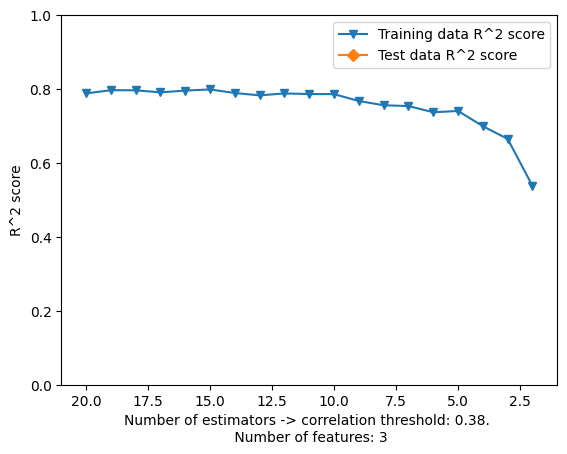

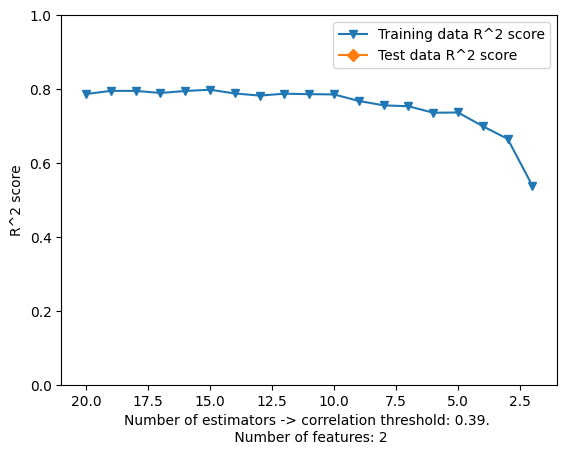

In [29]:
corre_list = [x / 100.0 for x in range(int(0.25*100), int(0.4*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == float(element)]
    plt.plot(element_['Number of estimators'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Number of estimators'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Number of estimators -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Number of estimators'])+1, min(element_['Number of estimators'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

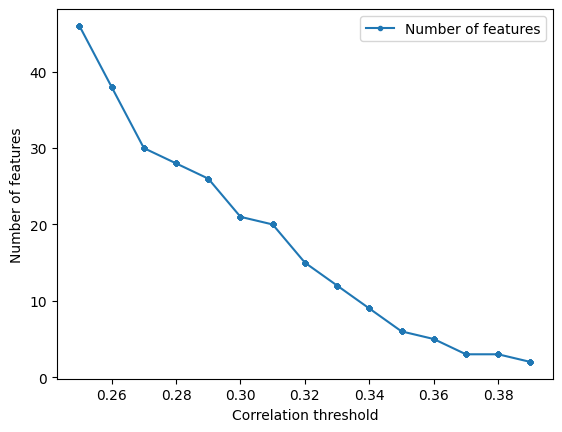

In [30]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [31]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.39


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Number of estimators
266,0.39,0.537429,-0.469886,2,2
267,0.39,0.664502,-8.410763,2,3
268,0.39,0.698753,-1.253751,2,4
269,0.39,0.736021,-3.262669,2,5
270,0.39,0.735324,-5.690064,2,6
271,0.39,0.752951,-5.056142,2,7
272,0.39,0.755313,-9.550503,2,8
273,0.39,0.767229,-12.834747,2,9
274,0.39,0.784906,-17.268386,2,10
275,0.39,0.785596,-20.638081,2,11


## sqrt(R^2)

In [32]:
r_a = df_without_standarization[df_without_standarization['Correlation threshold'] == picked_]
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    
r_a['test R value'] = xcz

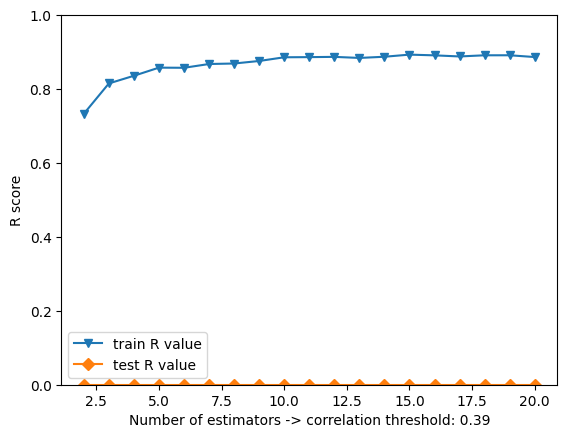

In [33]:
plt.plot(r_a['Number of estimators'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Number of estimators'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Number of estimators -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

## Final model

In [34]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standarization=False, 
                                                                                                    model_type='RandomForestRegressor',
                                                                                                    n_estimators_=12,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
          molecular descriptor name  corr_value  absolute correlation value
520                  ETA_dEpsilon_D    0.412783                    0.412783

In [35]:
final_model[0].estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1498160584),
 DecisionTreeRegressor(max_features=1.0, random_state=1346817781),
 DecisionTreeRegressor(max_features=1.0, random_state=768352140),
 DecisionTreeRegressor(max_features=1.0, random_state=392366725),
 DecisionTreeRegressor(max_features=1.0, random_state=233488247),
 DecisionTreeRegressor(max_features=1.0, random_state=476682624),
 DecisionTreeRegressor(max_features=1.0, random_state=1552795804),
 DecisionTreeRegressor(max_features=1.0, random_state=1368427163),
 DecisionTreeRegressor(max_features=1.0, random_state=1182837959),
 DecisionTreeRegressor(max_features=1.0, random_state=1832416971),
 DecisionTreeRegressor(max_features=1.0, random_state=128850005),
 DecisionTreeRegressor(max_features=1.0, random_state=107172470)]

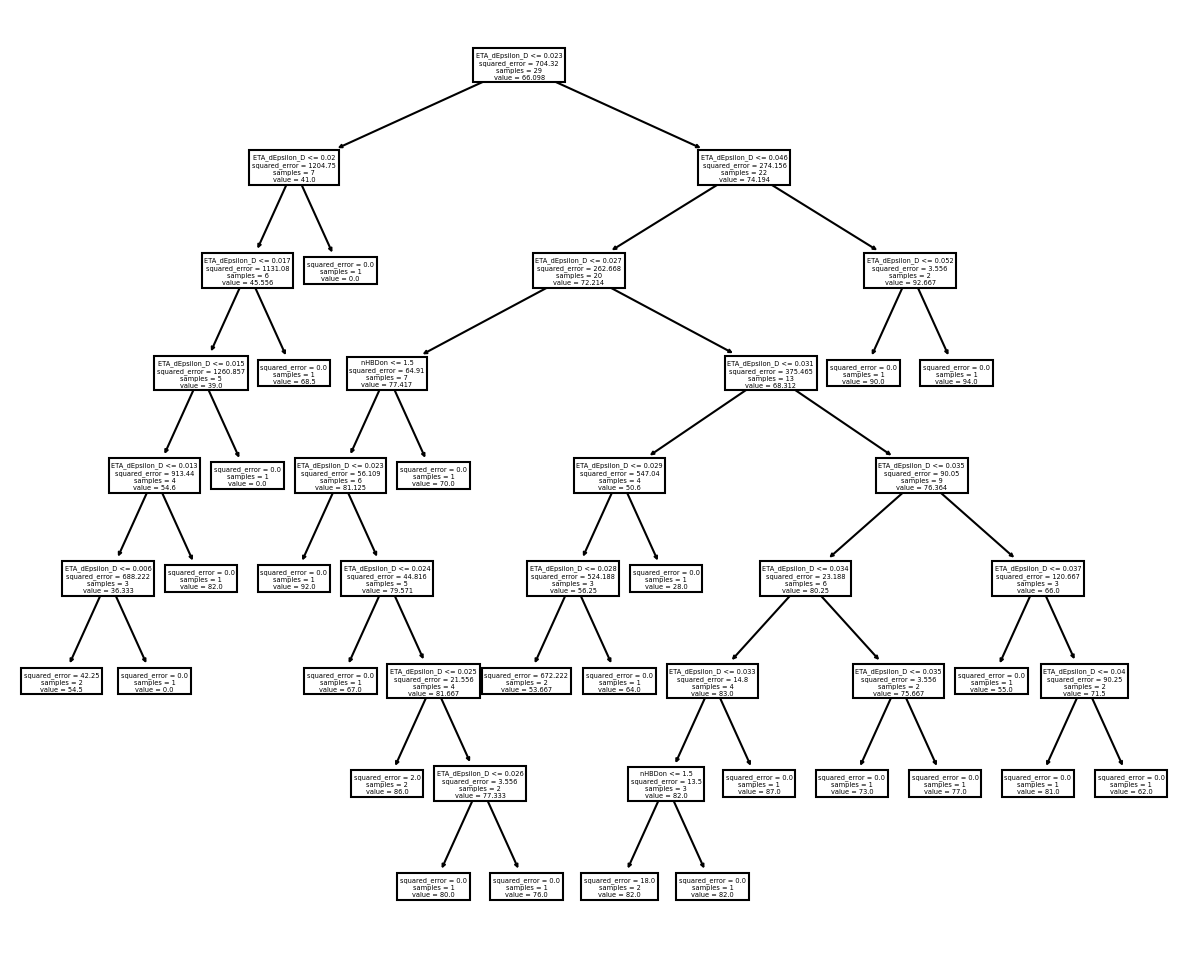

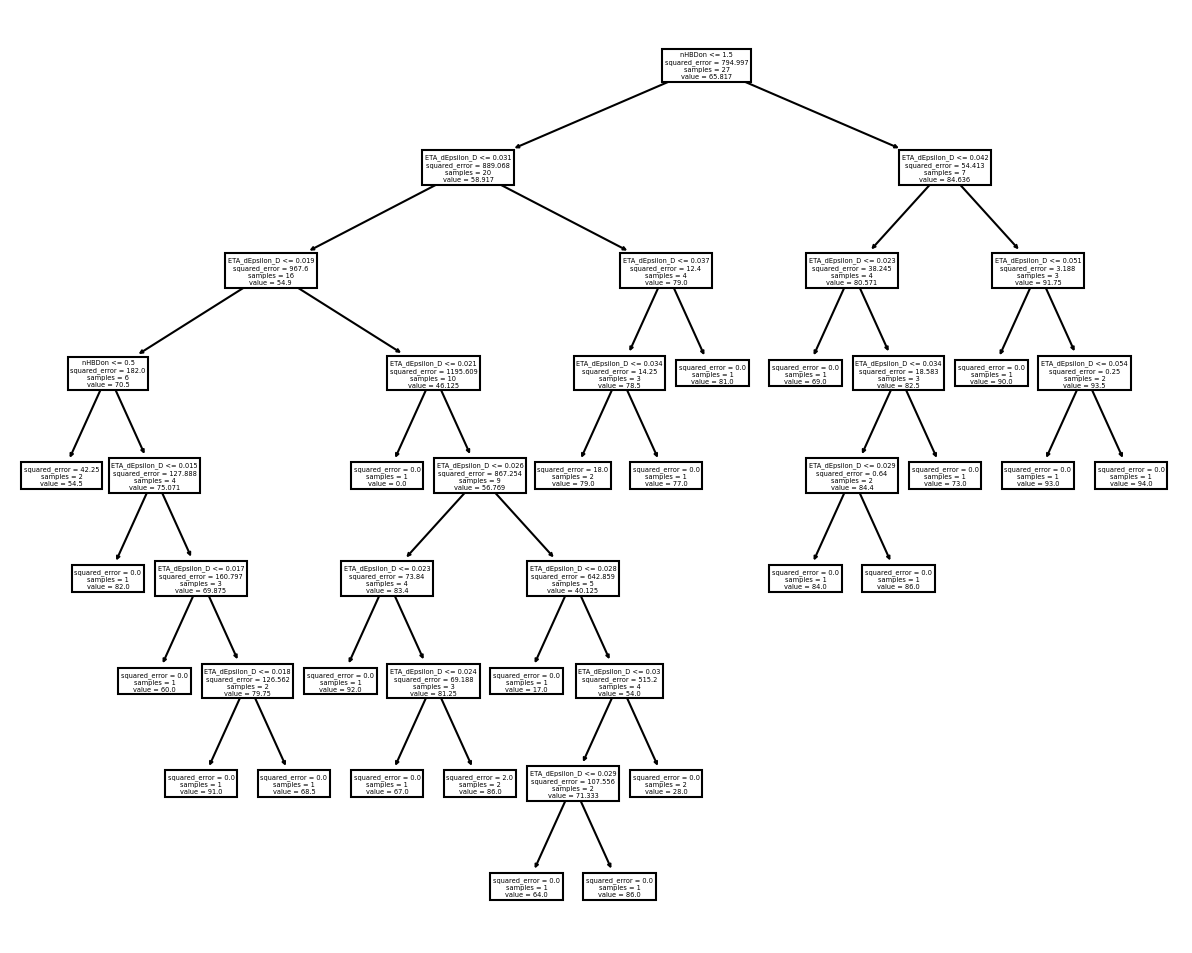

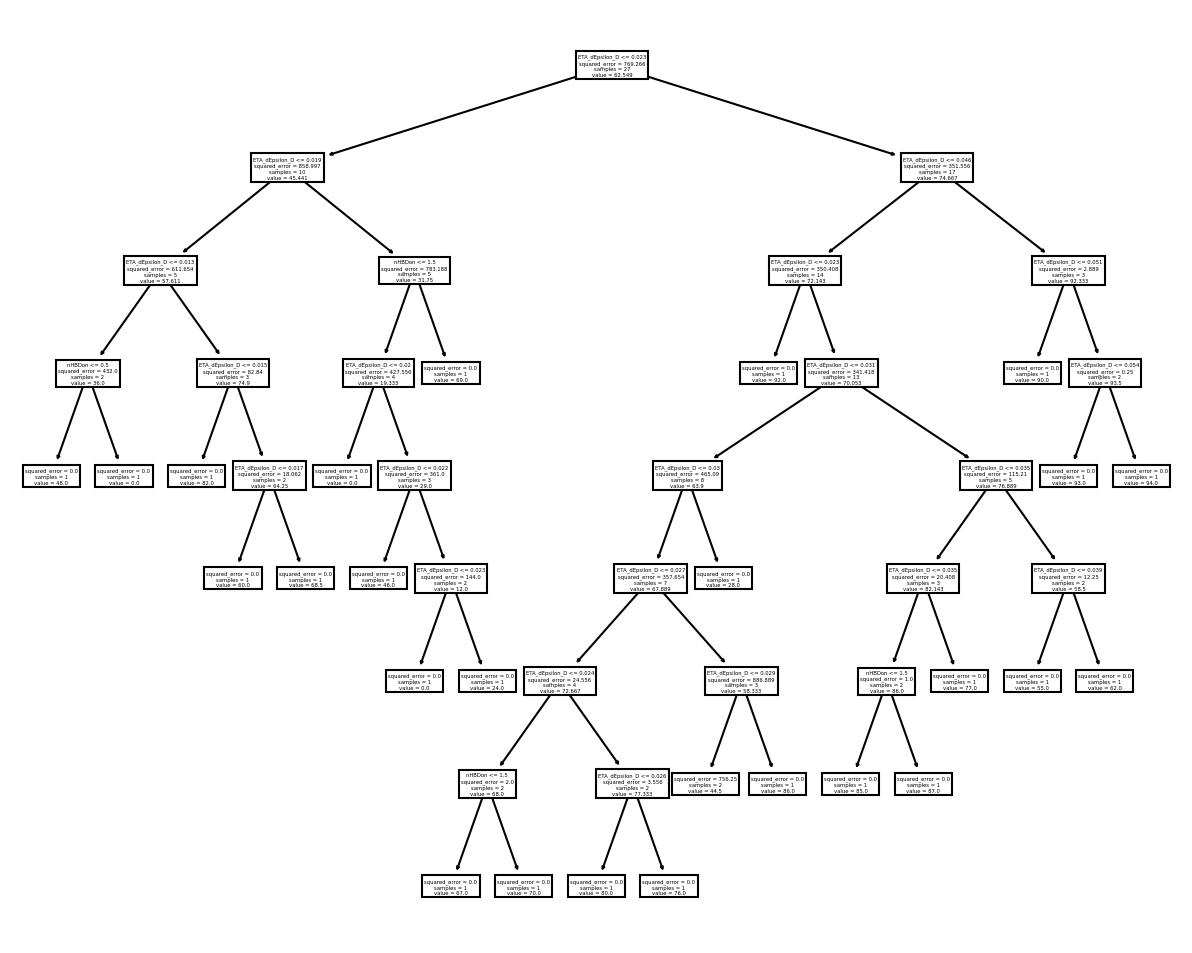

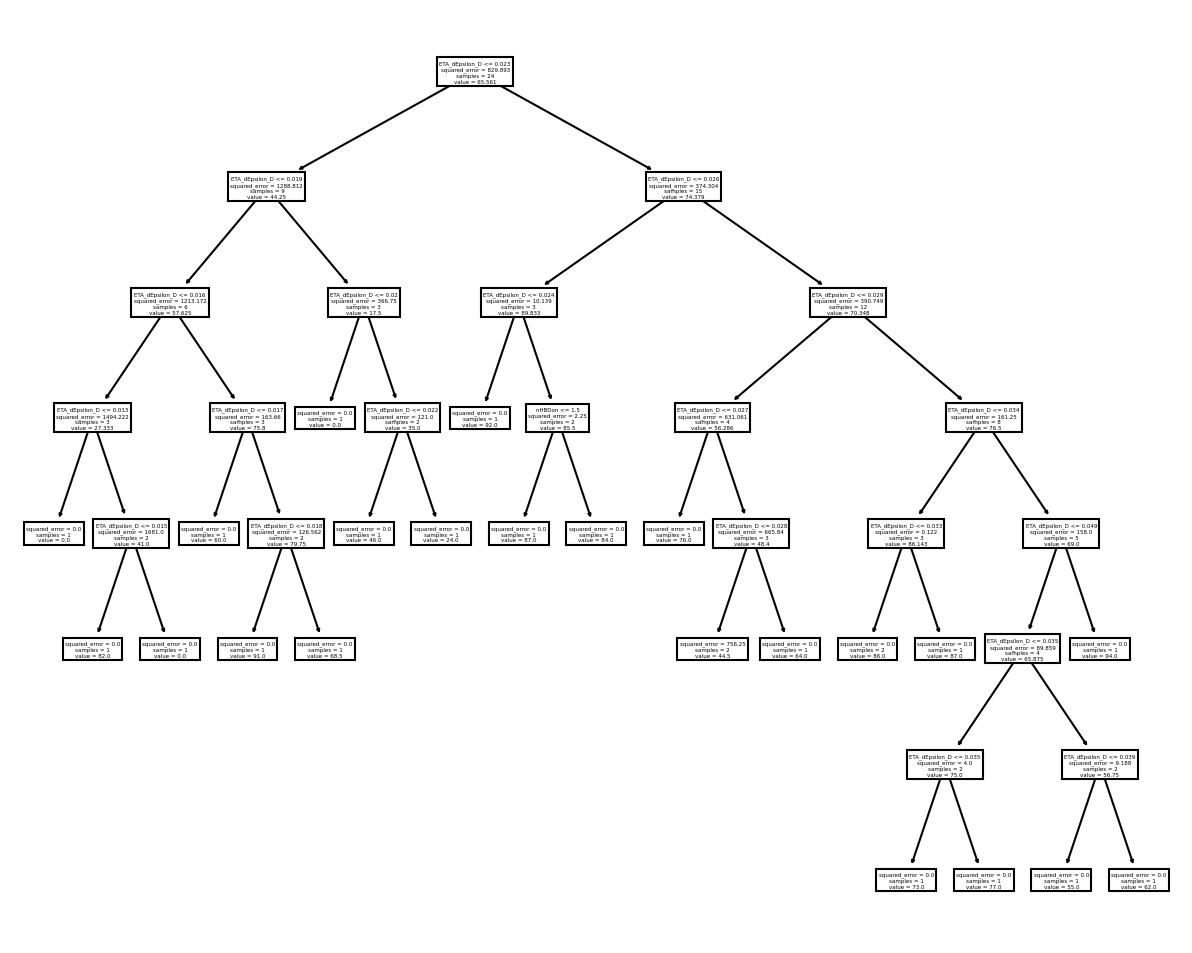

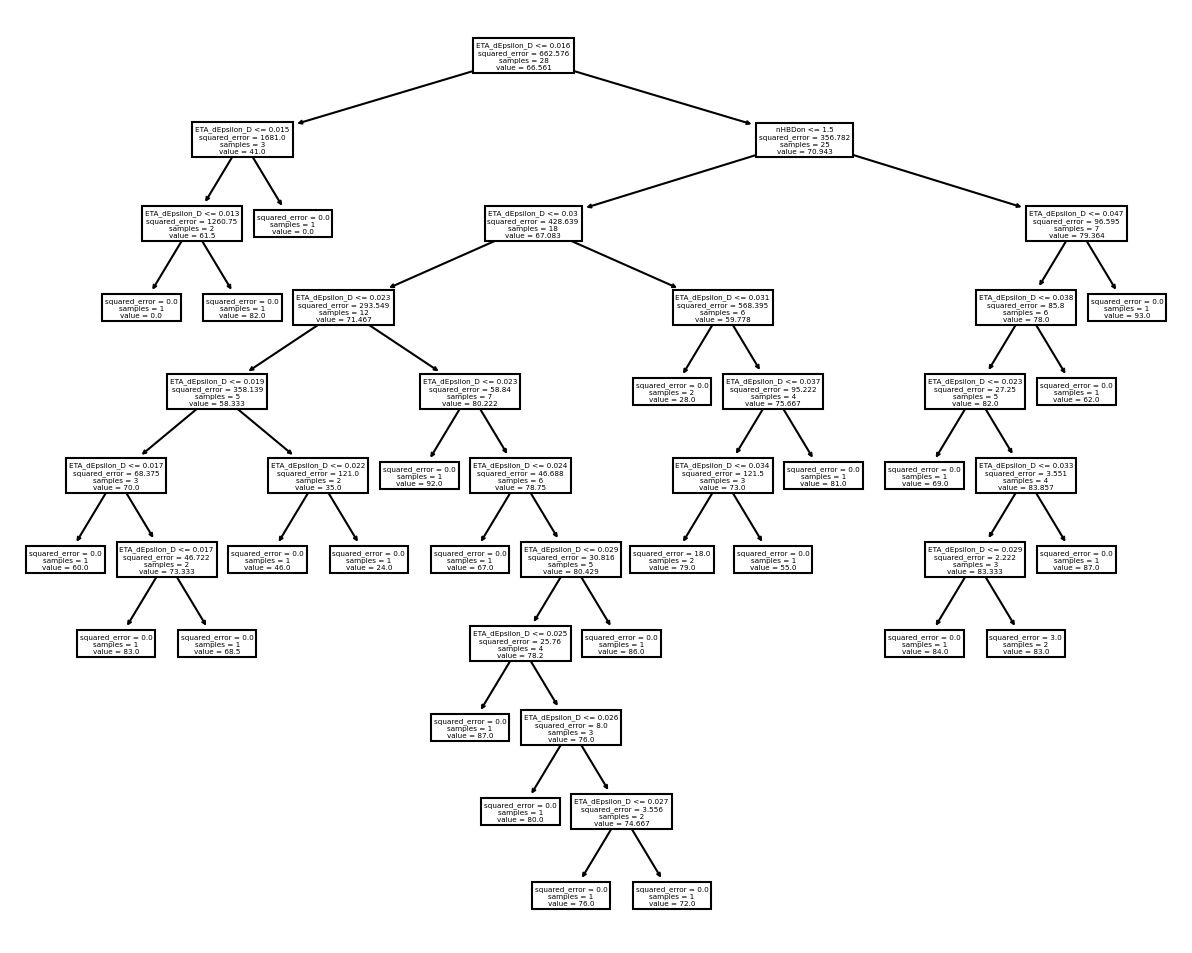

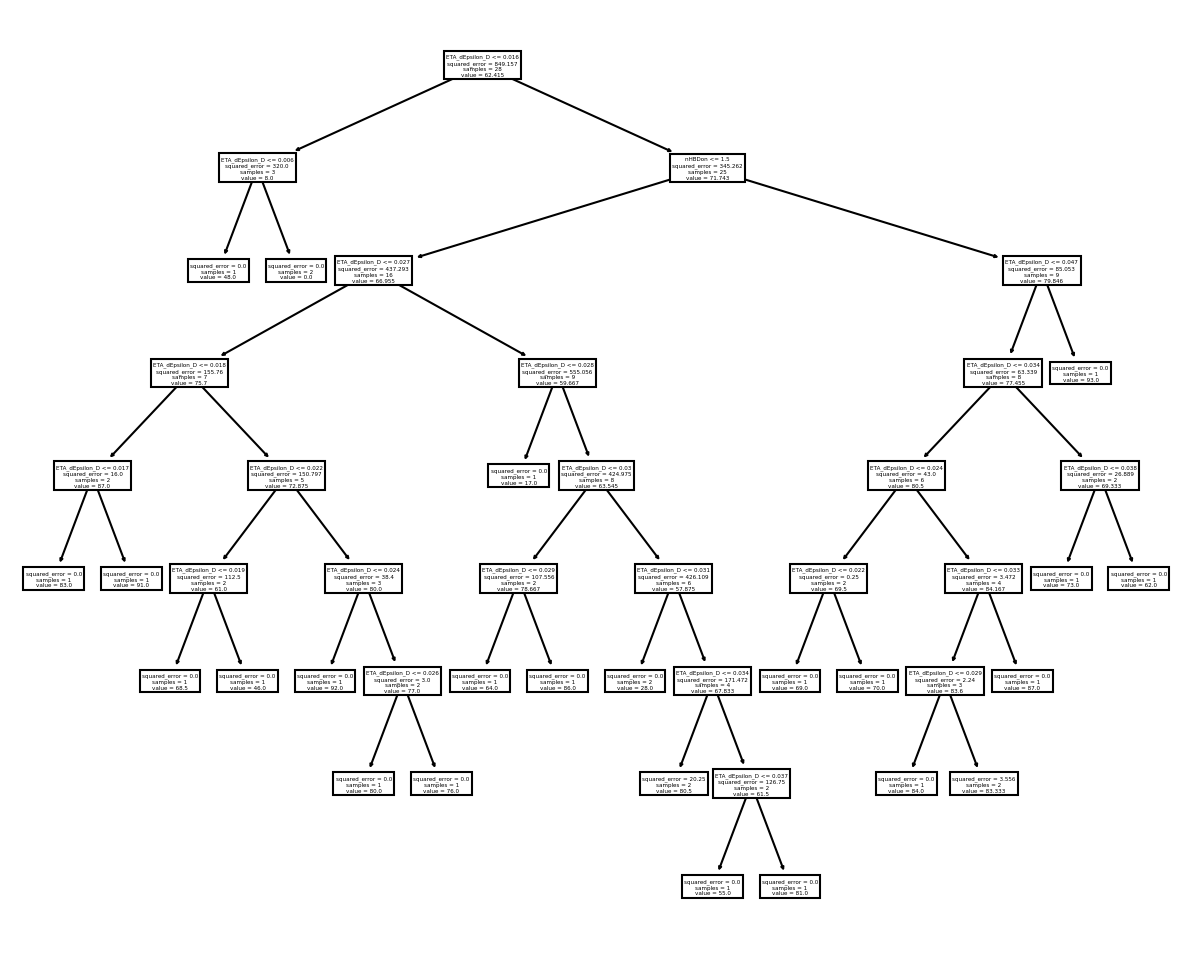

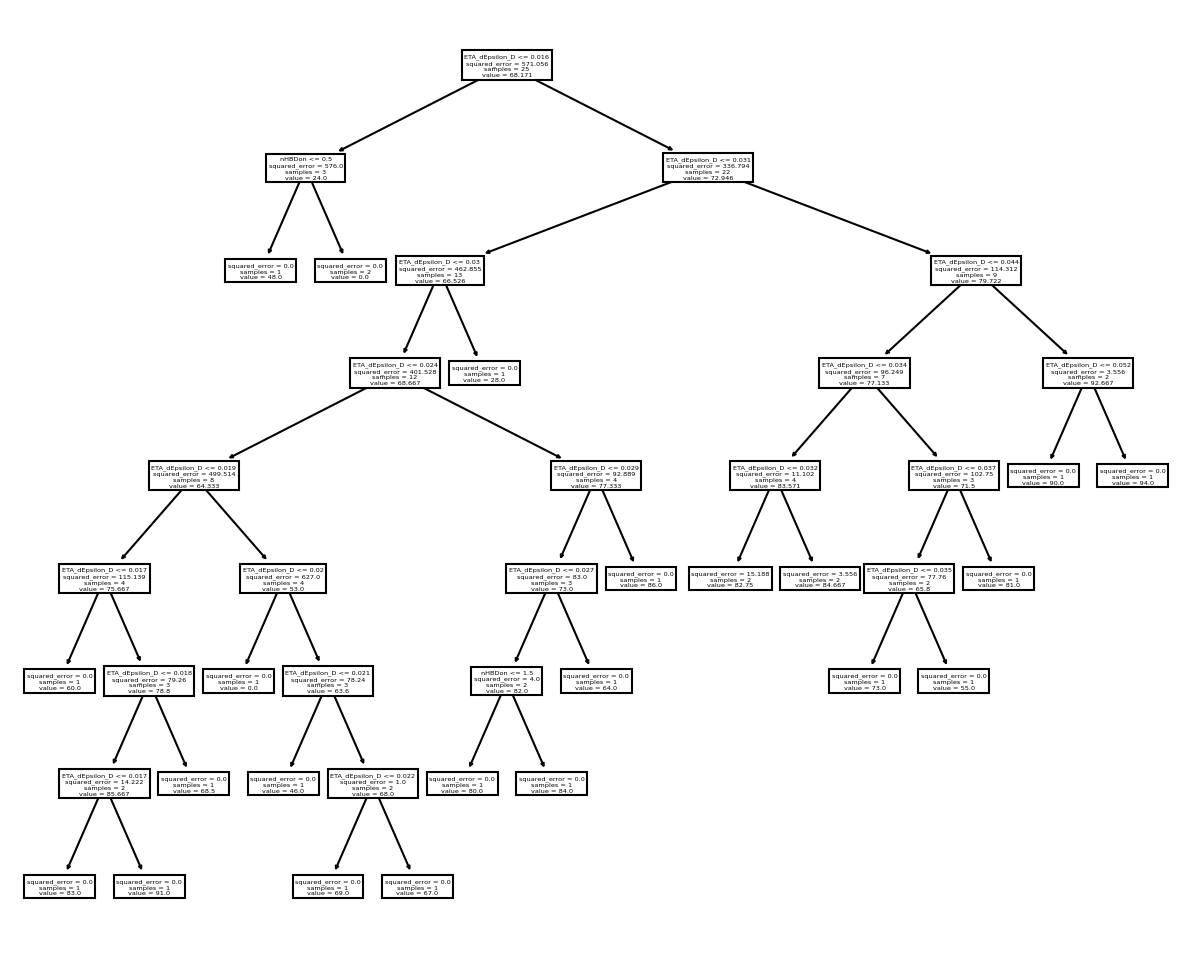

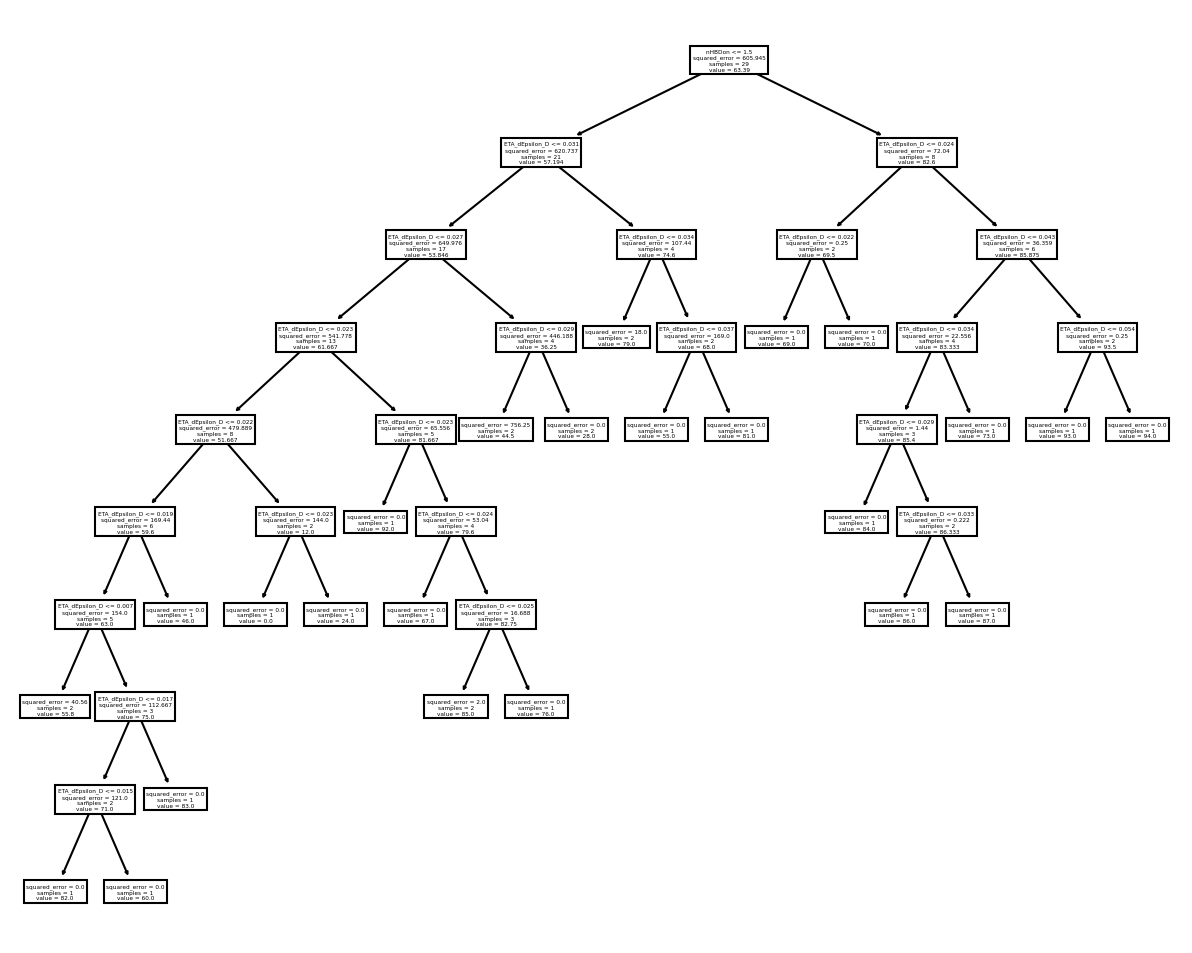

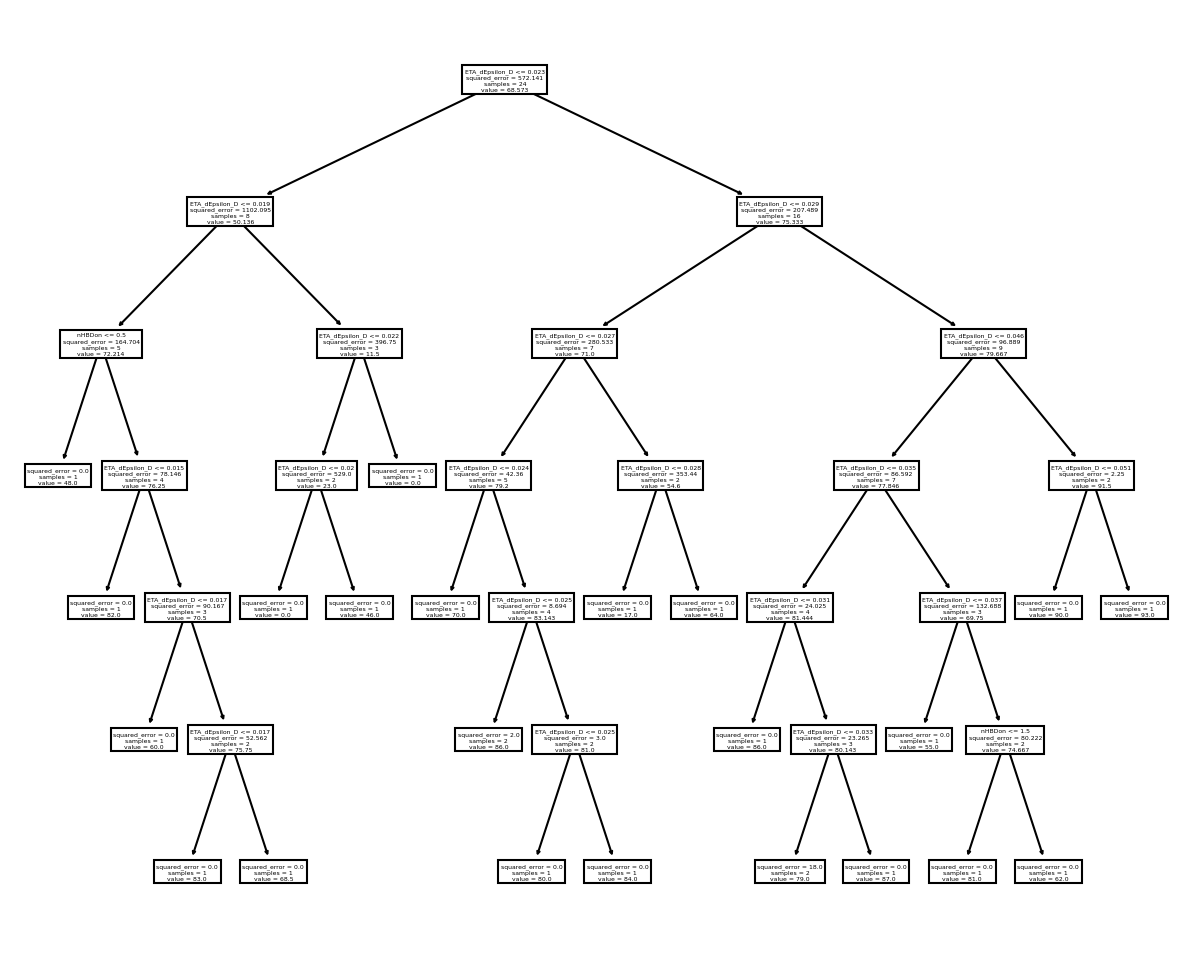

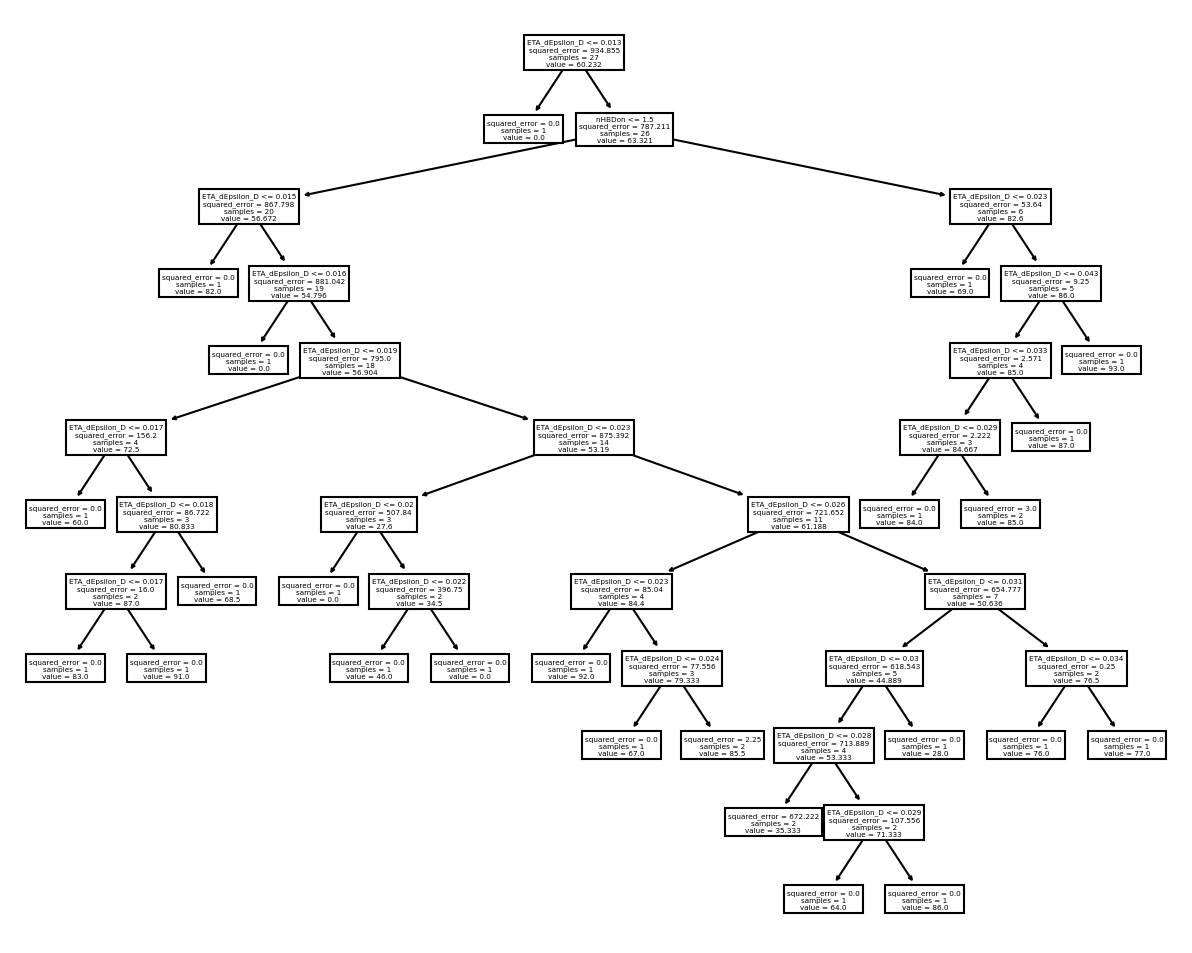

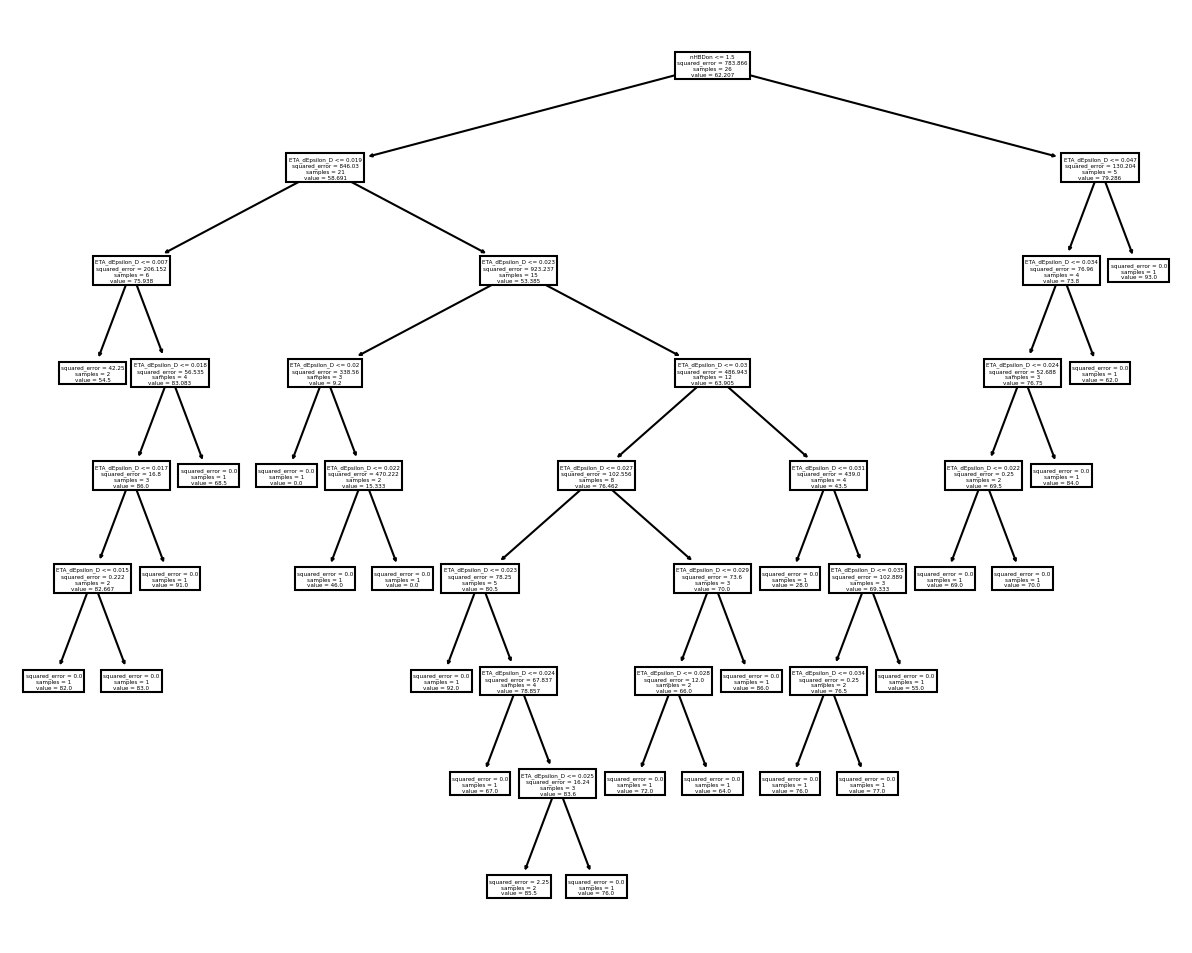

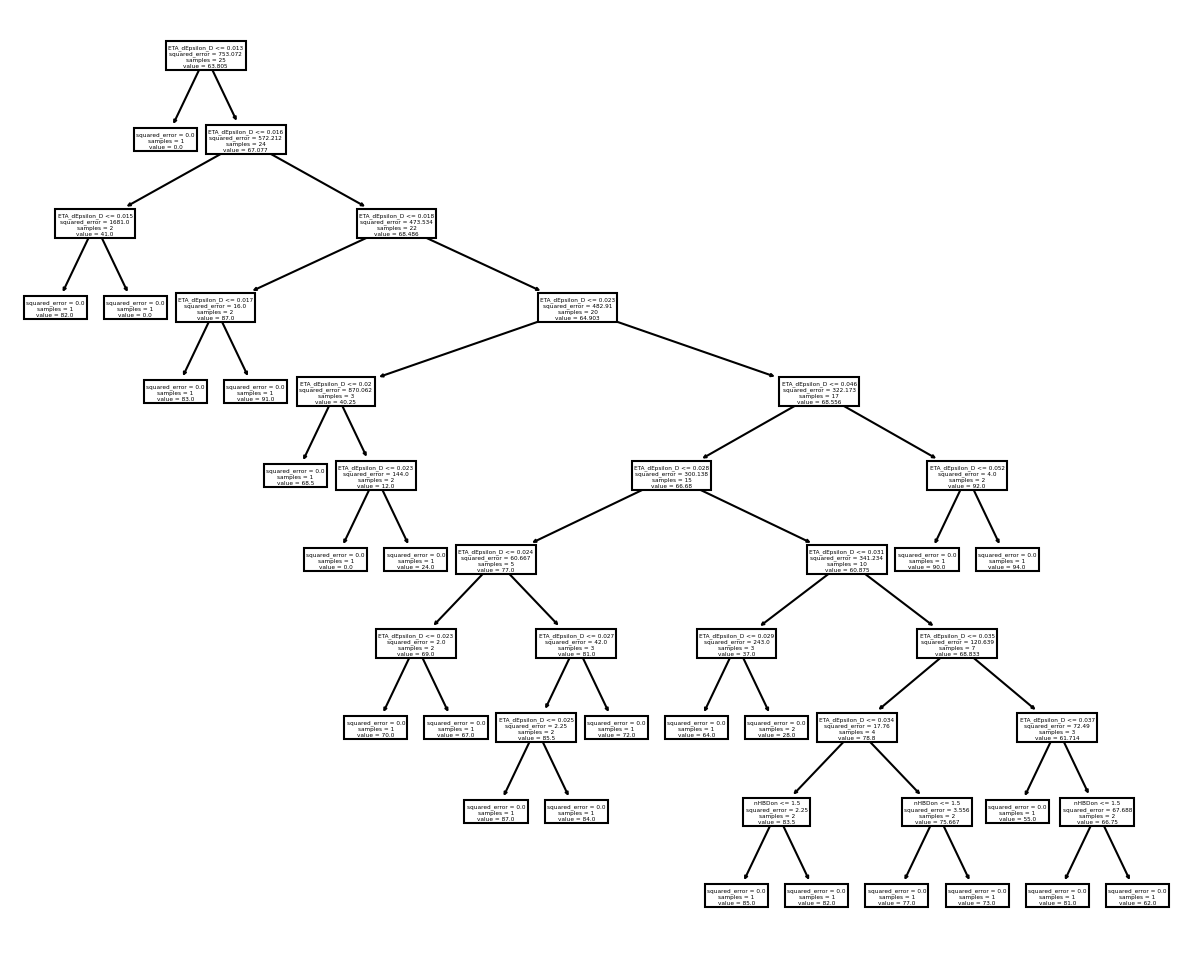

In [36]:
for x, decision_tree in enumerate(final_model[0].estimators_):
    plt.figure(figsize=(10,8), dpi=150)
    plot_tree(decision_tree, feature_names=list(final_model[4]['molecular descriptor name']))
    #plt.savefig('Random_forest/random_forest'+str(x)+'.svg')

In [37]:
final_model[4]

,molecular descriptor name,corr_value,absolute correlation value
520,ETA_dEpsilon_D,0.412783,0.412783
1160,nHBDon,0.394681,0.394681


In [38]:
# save
joblib.dump(final_model[0], "random_forest_model.joblib")
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("random_forest_model.joblib")

In [39]:
loaded_rf.predict(molecular_descriptors_df[final_model[4]['molecular descriptor name']])

array([66.63888889, 82.5       , 75.08333333, 53.66666667, 69.70833333,
       69.70833333, 60.75      , 78.83333333, 26.91666667, 68.33333333,
       27.33333333, 70.33333333, 34.275     , 26.66666667, 34.275     ,
       58.66666667, 74.16666667, 72.        , 80.77083333, 80.77083333,
       71.5       , 46.125     , 46.125     , 68.91666667, 83.        ,
       57.        , 86.25      , 34.275     , 61.41666667, 79.29166667,
       84.58333333, 84.58333333, 37.66666667, 34.5       , 59.75      ,
       24.91666667, 71.41666667, 93.58333333, 93.33333333, 91.58333333,
       81.41666667, 84.        , 84.        , 76.75      ])

In [40]:
molecular_descriptors_df['Aktywność cytoprotekcyjna [%]']

0     81.0
1     84.0
2     70.0
3     69.0
4     68.5
5     60.0
6     60.0
7     91.0
8      0.0
9     82.0
10     0.0
11    83.0
12    48.0
13     0.0
14    28.0
15    55.0
16    81.0
17    77.0
18    76.0
19    85.0
20    86.0
21    72.0
22    17.0
23    62.0
24    80.0
25    28.0
26    92.0
27    61.0
28    64.0
29    76.0
30    84.0
31    87.0
32    28.0
33    46.0
34    24.0
35     0.0
36    67.0
37    94.0
38    93.0
39    90.0
40    87.0
41    86.0
42    82.0
43    73.0
Name: Aktywność cytoprotekcyjna [%], dtype: float64

In [41]:
xsz = r2_score(loaded_rf.predict(molecular_descriptors_df[final_model[4]['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])
xsz

0.4912609963505382

In [42]:
np.sqrt(xsz)

0.7009001329365961

## Predict target feature

In [43]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

 21%|████████████████▉                                                               | 188/891 [00:04<00:13, 53.71it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaco

 22%|█████████████████▎                                                              | 193/891 [00:04<00:13, 51.66it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 96%|█████████████████████████████████████████████████████████████████████████████   | 858/891 [00:21<00:01, 19.81it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████████████████████████████████████████████████████| 891/891 [00:22<00:00, 39.56it/s]


Data size (rows, columns): (891, 1613)
Data size after first reduction (rows, columns): (891, 1226)
Data size after second reduction (rows, columns): (891, 1100)
There is issue with the target values...


In [44]:
predicted_activity = loaded_rf.predict(to_prediction[final_model[4]['molecular descriptor name']])

In [45]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [46]:
print(len(smiles))
print(len(predicted_activity))

891
891


In [47]:
save_to_df.head()

,SMILES
0,C1=CN(Cc2c[nH]c3ccccc23)CN1
1,C=C1NCc2cn(c(CC)n2)CC2(C)C=CC=C12
2,C=C1C=C(C)NCC2C=CC2CN1
3,C=C1CN(Cc2c[nH]c3ccccc23)C=N1
4,Cc1ncc2n1CC1=CC=CC1CNC2


In [48]:
save_to_df['Predicted activity'] = predicted_activity

In [49]:
save_to_df.head()

,SMILES,Predicted activity
0,C1=CN(Cc2c[nH]c3ccccc23)CN1,93.583333
1,C=C1NCc2cn(c(CC)n2)CC2(C)C=CC=C12,84.583333
2,C=C1C=C(C)NCC2C=CC2CN1,93.583333
3,C=C1CN(Cc2c[nH]c3ccccc23)C=N1,61.416667
4,Cc1ncc2n1CC1=CC=CC1CNC2,57.000000


In [50]:
save_to_df.to_excel('../Data/Predicted_random_forest.xlsx')

In [51]:
test = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df,
                                               correlation_threshold=0.39,
                                               standarization=False, 
                                               model_type='RandomForestRegressor',
                                               n_estimators_=6,
                                               train_test_split_=False, 
                                               verbose=True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
          molecular descriptor name  corr_value  absolute correlation value
520                  ETA_dEpsilon_D    0.412783                    0.412783

In [66]:
# save
joblib.dump([final_model[0], final_model[4]], "random_forest_model_12_estimators.joblib")
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("random_forest_model_12_estimators.joblib")

In [67]:
loaded_rf

[RandomForestRegressor(n_estimators=12, random_state=15),
      molecular descriptor name  corr_value  absolute correlation value
 520             ETA_dEpsilon_D    0.412783                    0.412783
 1160                    nHBDon    0.394681                    0.394681]